In [1]:
! pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # to split the model
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [3]:
data = pd.read_csv(r"E:\EXCELR\ASSIGNMENTS\Assignment 5\Toyoto corrola.csv")
print(data.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [4]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
data.shape

(1436, 11)

In [6]:
data.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [7]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
# Handle categorical variables: convert them into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [10]:
corr = data.corr()
corr

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [ ]:
sns.pairplot(data)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

In [13]:
X_features = data.drop(['Price'], axis = 1)
X_features.shape

X = sm.add_constant(X_features)
print(X.shape)

y = data['Price']
print(y.shape)

(1436, 10)
(1436,)


In [21]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size = 0.8, random_state=1000)
print(len(data))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

1436
(1148, 10) (288, 10)
(1148,) (288,)


In [23]:
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.rsquared

0.8640144735359777

In [24]:
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.863     
Dependent Variable: Price            AIC:                19800.2035
Date:               2024-07-08 21:04 BIC:                19850.6612
No. Observations:   1148             Log-Likelihood:     -9890.1   
Df Model:           9                F-statistic:        803.4     
Df Residuals:       1138             Prob (F-statistic): 0.00      
R-squared:          0.864            Scale:              1.7959e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Age_08_04  -124.2344   2.9258 -42.4612 0.0000  -129.9750  -118.4937
KM           -0.0181   0.0015 -11.9850 0.0000    -0.0210    -0.0151
Fuel_Type   417.1900 159.5291   2.6151 0.0090   104.1858   730.1942
HP           23.3328   3.2408   7.1997 0.0000    16.9742    29.6914
Automatic   346.3286 183.5821   1.8865 0.0595   -13.8688   706.5260
cc           -0.0141   0.0910  -0.1556 0.8764    -0.1926     0.1643
Doors       -27.5858  45.4163  -0.6074 0.5437  -116.6948    61.5233
Cylinders -2025.3296 422.5942  -4.7926 0.0000 -2854.4809 -1196.1783
Gears       550.6485 235.5011   2.3382 0.0195    88.5834  1012.7137
Weight       19.7911   1.1056  17.9004 0.0000    17.6218    21.9604
-------------------------------------------------------------------
Omnibus:             196.296       Durbin-Watson:          2.056   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1700.614
Skew:                -0.513        Prob(JB):               0.000   
Kurtosis:            8.874         Condition No.:          896303  
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 8.96e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

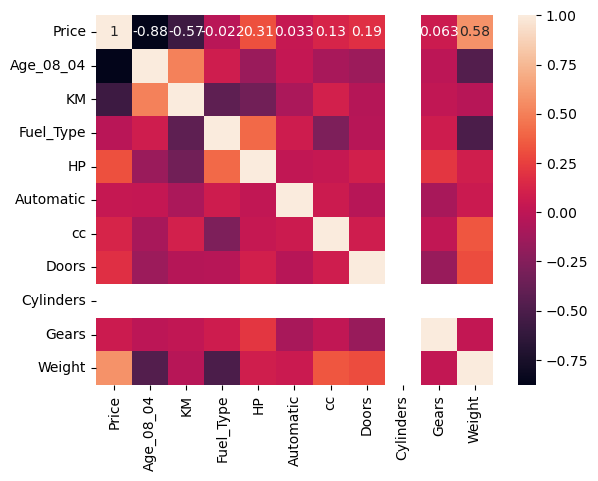

In [25]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [26]:
#Vif calculator for features
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif)

In [27]:
calc_vif(X)

,Variables,VIF
0,Age_08_04,1.918394
1,KM,1.946100
2,Fuel_Type,2.379914
3,HP,1.488481
4,Automatic,1.062652
5,cc,1.168921
6,Doors,1.186610
7,Cylinders,1756.548275
8,Gears,1.113522
9,Weight,2.327003


In [28]:
X = sm.add_constant(X_features)
X = X.drop(['KM','Cylinders'],axis=1)
X

,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,1,90,0,2000,3,5,1165
1,23,1,90,0,2000,3,5,1165
2,24,1,90,0,2000,3,5,1165
3,26,1,90,0,2000,3,5,1165
4,30,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,2,86,0,1300,3,5,1025
1432,72,2,86,0,1300,3,5,1015
1433,71,2,86,0,1300,3,5,1015
1434,70,2,86,0,1300,3,5,1015


In [29]:
calc_vif(X)

,Variables,VIF
0,Age_08_04,11.254804
1,Fuel_Type,41.105545
2,HP,65.431410
3,Automatic,1.113700
4,cc,17.242294
5,Doors,22.382680
6,Gears,515.176645
7,Weight,463.499119


In [30]:
#Fit the regression model
mlr_model_8F = sm.OLS(y,X).fit()
print('MLR_Model:',mlr_model.rsquared)
print('mlr_model_8F:',mlr_model_8F.rsquared)

MLR_Model: 0.8640144735359777
mlr_model_8F: 0.9839479142958418


# Residual analysis

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


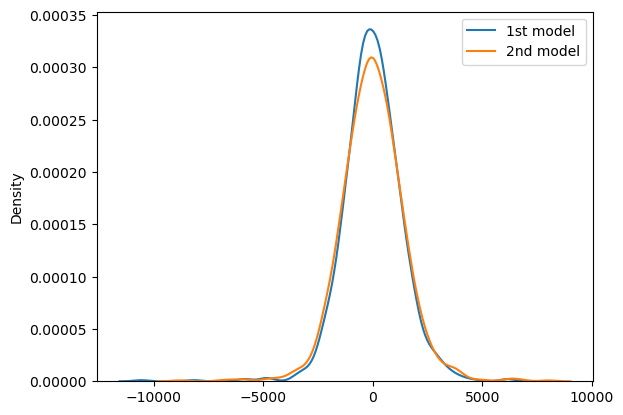

In [32]:
Residual1 = mlr_model.resid
Residual2 = mlr_model_8F.resid
sns.kdeplot(Residual1,label = '1st model')
sns.kdeplot(Residual2,label = '2nd model')
plt.legend()
plt.show()

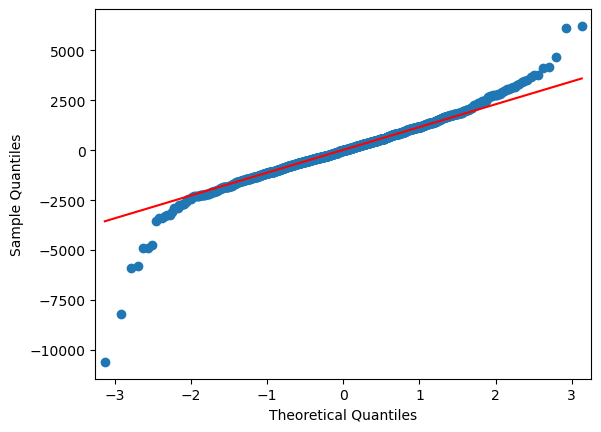

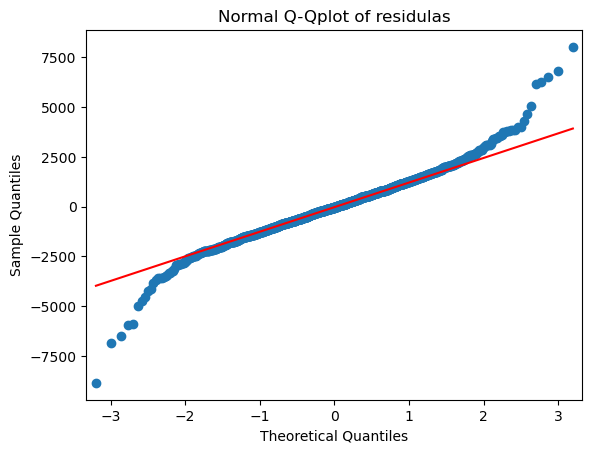

In [33]:
#Q-Q plot
qqplot = sm.qqplot(Residual1, line = 'q')
qqplot1 = sm.qqplot(Residual2, line = 'q')
plt.title("Normal Q-Qplot of residulas")
plt.show()

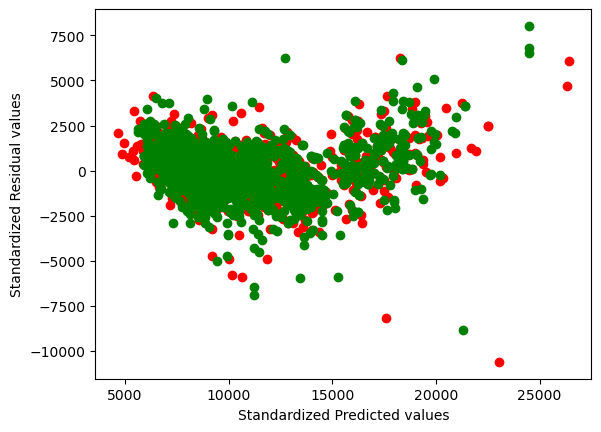

In [35]:
#Residual plot
plt.scatter(mlr_model.fittedvalues,mlr_model.resid,c = 'r')
plt.scatter(mlr_model_8F.fittedvalues,mlr_model_8F.resid,c = 'g')
plt.xlabel("Standardized Predicted values")
plt.ylabel("Standardized Residual values")
plt.show()

In [38]:
#Data transformation
#TRansformation of data via standardizattion method
def standardized_values(vals):
    return(vals - vals.mean())/vals.std()

In [39]:
X_standr = standardized_values(X)
print(X_standr)

      Age_08_04  Fuel_Type        HP  Automatic        cc     Doors     Gears  \
0     -1.771349  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
1     -1.771349  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
2     -1.717586  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
3     -1.610059  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
4     -1.395005  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
...         ...        ...       ...        ...       ...       ...       ...   
1431   0.701771   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1432   0.863061   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1433   0.809298   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1434   0.755534   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1435   1.078115   0.354213  0.567243  -0.242808  0.054536  1.014588 -0.140376   

        Weight  
0     1.75

In [40]:
round(X_standr.mean()),round(X_standr.std()) # standard normal with mean 0and sd 1

(Age_08_04   -0.0
 Fuel_Type    0.0
 HP          -0.0
 Automatic   -0.0
 cc           0.0
 Doors       -0.0
 Gears       -0.0
 Weight      -0.0
 dtype: float64,
 Age_08_04    1.0
 Fuel_Type    1.0
 HP           1.0
 Automatic    1.0
 cc           1.0
 Doors        1.0
 Gears        1.0
 Weight       1.0
 dtype: float64)

In [41]:
#X_standr = sm.add_constant(X_standr)
print(X_standr)
y_standr = standardized_values(y)

      Age_08_04  Fuel_Type        HP  Automatic        cc     Doors     Gears  \
0     -1.771349  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
1     -1.771349  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
2     -1.717586  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
3     -1.610059  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
4     -1.395005  -2.337054 -0.767774  -0.242808  0.997072 -1.084761 -0.140376   
...         ...        ...       ...        ...       ...       ...       ...   
1431   0.701771   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1432   0.863061   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1433   0.809298   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1434   0.755534   0.354213 -1.034778  -0.242808 -0.652367 -1.084761 -0.140376   
1435   1.078115   0.354213  0.567243  -0.242808  0.054536  1.014588 -0.140376   

        Weight  
0     1.75

In [42]:
X_standr.shape, y_standr.shape

((1436, 8), (1436,))

# Fit the regression model

In [43]:
mlr_model_3 = sm.OLS(y_standr,X_standr).fit()
print("MLR Model:",mlr_model_3.rsquared)
print("MLR Model_2:",mlr_model_8F.rsquared) 

MLR Model: 0.8480061670087529
MLR Model_2: 0.9839479142958418


In [44]:
mlr_model_3 = sm.OLS(y_standr,X_standr).fit()
print("MLR Model:",mlr_model_3.rsquared_adj)
print("MLR Model_2:",mlr_model_8F.rsquared_adj)

MLR Model: 0.847154660941575
MLR Model_2: 0.9838579866448381


# Outlier analysis

In [45]:
sm_model = sm.regression.linear_model.OLS(y_standr,X_standr).fit()
influence = sm_model.get_influence()
influence_list = influence.cooks_distance[0]
influence_df = pd.DataFrame(influence_list, columns = ['influence'])
influence_df.index = X_standr.index

cooks_df = X_standr.merge(influence_df, left_index = True, right_index = True)
cooks_df

,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,influence
0,-1.771349,-2.337054,-0.767774,-0.242808,0.997072,-1.084761,-0.140376,1.757949,2.536538e-03
1,-1.771349,-2.337054,-0.767774,-0.242808,0.997072,-1.084761,-0.140376,1.757949,2.031080e-03
2,-1.717586,-2.337054,-0.767774,-0.242808,0.997072,-1.084761,-0.140376,1.757949,1.405066e-03
3,-1.610059,-2.337054,-0.767774,-0.242808,0.997072,-1.084761,-0.140376,1.757949,1.063518e-04
4,-1.395005,-2.337054,-0.767774,-0.242808,0.997072,-1.084761,-0.140376,1.852931,6.228896e-04
...,...,...,...,...,...,...,...,...,...
1431,0.701771,0.354213,-1.034778,-0.242808,-0.652367,-1.084761,-0.140376,-0.901569,4.170510e-06
1432,0.863061,0.354213,-1.034778,-0.242808,-0.652367,-1.084761,-0.140376,-1.091535,1.935563e-03
1433,0.809298,0.354213,-1.034778,-0.242808,-0.652367,-1.084761,-0.140376,-1.091535,2.277962e-04
1434,0.755534,0.354213,-1.034778,-0.242808,-0.652367,-1.084761,-0.140376,-1.091535,8.073620e-07


In [46]:
#Setting the threshold and getting the ouliers
original_length = len(X_standr)
cooks_threshold = 4/original_length # by looking at influence columns 4 values are higher, o.w we have to fix threshold value
cooks_outliers = cooks_df[cooks_df['influence'] > cooks_threshold]
cooks_outliers.sort_values(by=['influence'])
print(original_length)
print(cooks_threshold)
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers)/original_length * 100}% of our dataset")

1436
0.002785515320334262
Removed: 71
This is 4.944289693593315% of our dataset


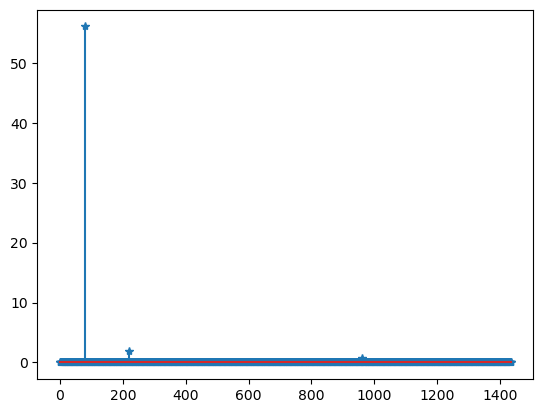

In [47]:
plt.stem(np.arange(len(X_standr)), np.round(influence_list, 3), markerfmt = '*')
plt.show()

In [48]:
#Leverage value
p = X_standr.shape[1]
n = X_standr.shape[0]
leverage_cutoff = 3*((p+1)/n)
print("Number of variables:",p,"and number of observations: ",n)
print("Cutoff for leverage value: ", round(leverage_cutoff, 3))

Number of variables: 8 and number of observations:  1436
Cutoff for leverage value:  0.019


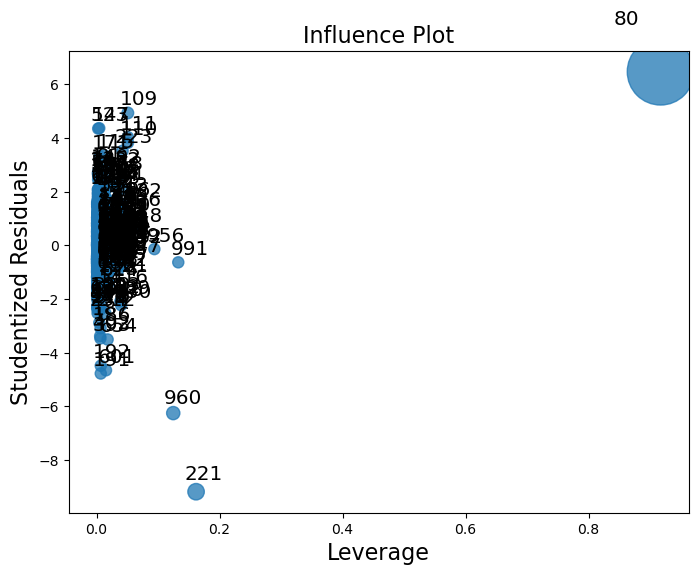

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (8,6))
influence_plot(mlr_model_3, ax = ax)
plt.show()

In [52]:
X_standr_out = X_standr.drop(X_standr.index[[16,8,27,28]],axis = 0).reset_index()
X_standr_out = X_standr_out.drop(['index'],axis=1)
print(len(X_standr_out))

1432


In [53]:
y_standr_out = y_standr.drop(y_standr.index[[16,8,27,28]],axis = 0).reset_index()
y_standr_out = y_standr_out.drop(['index'],axis=1).values

In [54]:
X_standr_out.shape, y_standr_out.shape

((1432, 8), (1432, 1))

In [55]:
mlr_model_4 = sm.OLS(y_standr_out,X_standr_out).fit()
mlr_model_4.rsquared

0.8461447231210555

In [56]:
mlr_model_4 = sm.OLS(y_standr_out,X_standr_out).fit()
mlr_model_4.rsquared_adj

0.8452803676329715

In [57]:
test_X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
601,50,1,1,90,0,2000,3,4,5,1260
1149,74,100732,2,86,1,1300,4,4,5,1030
843,62,66082,2,110,0,1600,5,4,5,1070
581,52,31579,2,97,0,1400,3,4,5,1025
1315,70,68000,2,86,1,1300,3,4,5,1045
...,...,...,...,...,...,...,...,...,...,...
1276,75,74096,2,110,0,1600,3,4,5,1050
952,60,52487,2,110,0,1600,4,4,5,1035
198,42,105699,2,97,0,1400,3,4,5,1025
918,65,57374,2,110,0,1600,5,4,5,1075


In [ ]:
1. Normalization typically refers to the process of scaling individual samples to have unit norm.
It often involves rescaling the data to a range of [0, 1] or [-1, 1]. One common method of normalization is min-max scaling 
Standardization (or Z-score normalization) transforms the data to have a mean of zero and a standard deviation of one. 
This is done by subtracting the mean and dividing by the standard deviation.

In [ ]:
2. VIF and condition index can be useful